In [1]:
################################################################################################
###
### Main analysis for 2xTetOn chimeras
###
################################################################################################

In [2]:
from skimage.io import imread
from skimage.io import imsave
from skimage import filters
from skimage import morphology
from pyclesperanto_prototype import imshow
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt

In [3]:
import napari
from napari.utils import nbscreenshot

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from skimage import measure
import os
os.getcwd()

'/groups/tanaka/People/current/jiwang/projects/RA_competence/scripts'

In [5]:
def show(image_to_show, labels=False):
    """
    This function generates three projections: in X-, Y- and Z-direction and shows them.
    """
    projection_x = cle.maximum_x_projection(image_to_show)
    projection_y = cle.maximum_y_projection(image_to_show)
    projection_z = cle.maximum_z_projection(image_to_show)

    fig, axs = plt.subplots(1, 3, figsize=(15, 15))
    cle.imshow(projection_x, plot=axs[0], labels=labels)
    cle.imshow(projection_y, plot=axs[1], labels=labels)
    cle.imshow(projection_z, plot=axs[2], labels=labels)
    plt.show()


In [6]:
import pandas as pd
from skimage import measure
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
import pyclesperanto_prototype as cle
from skimage import filters
from skimage.filters import try_all_threshold
import napari_simpleitk_image_processing as nsitk

In [6]:
############################################################
###
### NKX22 FoxA2 Pax6 d3, d4, d6  
### 
###
############################################################

In [7]:
imageDir = "../images_data/d3-4-6_10x_PKO-FKO_chim_fulldataset/d3-4-6_stain-FA2-Px6"
outDir = "../images_data/results/PKO_FKO_d3_4_5_genotype_FoxA2_Pax6"

if not os.path.exists(outDir):
    os.mkdir(outDir)
#os.path.exists(outDir)

In [8]:
#fileName = '241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C7_13_01_isotropic'
fileName = "241023_10x_d4-2umZ_1-FS-PG_RA_FA2-Px6_C7_13_01_isotropic"

In [ ]:
mask = imread(os.path.join(imageDir, str(fileName + "_C5_CystMask.tiff"))) # mask segmeted cysts
C1 = imread(os.path.join(imageDir, str(fileName + "_C1.tif"))) # FoxA2, nuclei
C2 = imread(os.path.join(imageDir, str(fileName + "_C2.tif"))) # FoxA2-KO genotype Scarlet, nuclei
C3 = imread(os.path.join(imageDir, str(fileName + "_C3.tif"))) # Pax6-KO genotype 
C4 = imread(os.path.join(imageDir, str(fileName + "_C4.tif"))) # Pax6, nuclei

In [ ]:
C1 = C1 / np.quantile(C1, 0.95)
C2 = C2 / np.quantile(C2, 0.95)
C3 = C3 / np.quantile(C3, 0.95)
C4 = C4 / np.quantile(C4, 0.95)

In [ ]:
cutoff_pxko = threshold_otsu(C3)
cutoff_fako = threshold_otsu(C2)
cutoff_foxa2 = threshold_otsu(C1)
cutoff_pax6 = threshold_otsu(C4)
print(cutoff_pxko, cutoff_fako, cutoff_foxa2, cutoff_pax6)

cutoff_pxko = filters.threshold_isodata(C3)
cutoff_fako = filters.threshold_isodata(C2)
cutoff_foxa2 = filters.threshold_isodata(C1)
cutoff_pax6 = filters.threshold_isodata(C4)
print(cutoff_pxko, cutoff_fako, cutoff_foxa2, cutoff_pax6)

In [ ]:
from skimage import measure
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
import pyclesperanto_prototype as cle
from skimage import filters
from skimage.filters import try_all_threshold
import napari_simpleitk_image_processing as nsitk

In [ ]:
labels_mask, nb_cyst = measure.label(mask, return_num = True)
nb_cyst 

In [ ]:
i = 1

In [ ]:
cyst_index = np.where(labels_mask == i)
#print(cyst_index[0].size)
genotype_pxko = C3[cyst_index]
genotype_fako = C2[cyst_index]
pax6 = C4[cyst_index]
foxa2 = C1[cyst_index]

In [ ]:
cutoff_pxko = threshold_otsu(genotype_pxko)
cutoff_fako = threshold_otsu(genotype_fako)
cutoff_foxa2 = threshold_otsu(foxa2)
cutoff_pax6 = threshold_otsu(pax6)
print(cutoff_pxko, cutoff_fako, cutoff_foxa2, cutoff_pax6)

In [ ]:
cutoff_pxko = filters.threshold_mean(genotype_pxko)
cutoff_fako = filters.threshold_mean(genotype_fako)
cutoff_foxa2 = filters.threshold_mean(foxa2)
cutoff_pax6 = filters.threshold_mean(pax6)
print(cutoff_pxko, cutoff_fako, cutoff_foxa2, cutoff_pax6)

In [ ]:
cutoff_pxko = filters.threshold_isodata(genotype_pxko)
cutoff_fako = filters.threshold_isodata(genotype_fako)
cutoff_foxa2 = filters.threshold_isodata(foxa2)
cutoff_pax6 = filters.threshold_isodata(pax6)
print(cutoff_pxko, cutoff_fako, cutoff_foxa2, cutoff_pax6)

In [ ]:
cutoff_pxko = filters.threshold_li(genotype_pxko)
cutoff_fako = filters.threshold_li(genotype_fako)
cutoff_foxa2 = filters.threshold_li(foxa2)
cutoff_pax6 = filters.threshold_li(pax6)
print(cutoff_pxko, cutoff_fako, cutoff_foxa2, cutoff_pax6)

In [ ]:
cutoff_pxko = filters.threshold_yen(genotype_pxko)
cutoff_fako = filters.threshold_yen(genotype_fako)
cutoff_foxa2 = filters.threshold_yen(foxa2)
cutoff_pax6 = filters.threshold_yen(pax6)
print(cutoff_pxko, cutoff_fako, cutoff_foxa2, cutoff_pax6)

In [ ]:
sels = np.where((genotype_pxko > cutoff_pxko) | (genotype_fako > cutoff_fako))
genotype_pxko_sels = genotype_pxko[sels]
genotype_fako_sels = genotype_fako[sels]
pax6_sels = pax6[sels]
foxa2_sels = foxa2[sels]

In [ ]:
# specify the FoxA2-KO and Pax6-KO genotype voxels 
index_pxko = np.where(genotype_pxko_sels > genotype_fako_sels)
index_fako = np.where(genotype_pxko_sels < genotype_fako_sels)

index_pxko[0].size/(index_pxko[0].size + index_fako[0].size)

In [ ]:
foxa2_fako = foxa2_sels[index_fako]
pax6_fako = pax6_sels[index_fako]
index_foxa2_fako = np.where((foxa2_fako > cutoff_foxa2) & (pax6_fako < cutoff_pax6))
index_pax6_fako = np.where((foxa2_fako < cutoff_foxa2) & (pax6_fako > cutoff_pax6))
index_foxa2_fako[0].size, index_pax6_fako[0].size

In [ ]:
foxa2_pxko = foxa2_sels[index_pxko]
pax6_pxko = pax6_sels[index_pxko]
index_foxa2_pxko = np.where((foxa2_pxko > cutoff_foxa2) & (pax6_pxko < cutoff_pax6))
index_pax6_pxko = np.where((foxa2_pxko < cutoff_foxa2) & (pax6_pxko > cutoff_pax6))
index_pax6_pxko[0].size, index_foxa2_pxko[0].size

In [ ]:
#fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.5))
#ax = axes.ravel()
#ax[0].imshow(, cmap='gray')
#ax[0].set_title('Original')
#ax[0].axis('off')
plt.hist(C4.ravel(), bins=200)
plt.axvline(cutoff_pax6, color='r')
#plt.hist(a, bins='auto')  # arguments are passed to np.histogram
#plt.title("Histogram with 'auto' bins")
plt.ylim([0, 500000])
#plt.xlim([0, 16])
#plt.ylim([0, 2])
plt.show()


In [ ]:
plt.hist(C2.ravel(), bins=200)
plt.axvline(cutoff_fako, color='r')
plt.ylim([0, 100000])
#plt.hist(a, bins='auto')  # arguments are passed to np.histogram
#plt.title("Histogram with 'auto' bins")
plt.show()

In [11]:
import pandas as pd
from skimage import measure
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage import measure
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
import pyclesperanto_prototype as cle
from skimage import filters
from skimage.filters import try_all_threshold
import napari_simpleitk_image_processing as nsitk

from skimage import measure
#data = {"image": [], "cyst_index": [], "cyst_size": [],"genotype_total": [],  "nb_fxko": [], "nb_pxko": [], "fxko_nb_foxa2": [], "fxko_nb_pax6": [],  
#        "pxko_nb_foxa2": [], "pxko_nb_pax6": [],
#        "cutoff_fxko": [],  "cutoff_pxko": [],  "cutoff_foxa2": [],  "cutoff_pax6": []}
#df = pd.DataFrame(data)
#df
data = {"image": [], "cyst_index": [], "cyst_size": [], 
         "nb_fxko_global": [], "nb_pxko_global": [], "nb_foxa2_global": [], "nb_pax6_global": [],
         "cutoff_fxko_image": [],  "cutoff_pxko_image": [], "cutoff_foxa2_image": [], "cutoff_pax6_image": [],
        "nb_fxko_cyst": [], "nb_pxko_cyst": [], "nb_foxa2_cyst": [], "nb_pax6_cyst": [],
        "genotype_total": [],  "nb_fxko": [], "nb_pxko": [], "fxko_nb_foxa2": [], "fxko_nb_pax6": [],  
        "pxko_nb_foxa2": [], "pxko_nb_pax6": [],
        "cutoff_fxko": [],  "cutoff_pxko": [],  "cutoff_foxa2": [],  "cutoff_pax6": [],
        "quantile95_fako_image": [], "quantile95_pxko_image": [], "quantile95_foxa2_image":[], "quantile95_pax6_image":[], 
        "quantile95_fako":[], "quantile95_pxko":[], "quantile95_foxa2":[], "quantile95_pax6":[]
       }
df = pd.DataFrame(data)
df

,image,cyst_index,cyst_size,nb_fxko_global,nb_pxko_global,nb_foxa2_global,nb_pax6_global,cutoff_fxko_image,cutoff_pxko_image,cutoff_foxa2_image,...,cutoff_foxa2,cutoff_pax6,quantile95_fako_image,quantile95_pxko_image,quantile95_foxa2_image,quantile95_pax6_image,quantile95_fako,quantile95_pxko,quantile95_foxa2,quantile95_pax6


In [12]:
for nm in os.listdir(imageDir):
    if "_C5_CystMask.tiff" in nm:
        #print(nm)
        fileName = nm.replace('_C5_CystMask.tiff','')
        #files += [nm]
        print(fileName)
        #make_composite_C5(newName, ImageDir, outDir)
        
        mask = imread(os.path.join(imageDir, str(fileName + "_C5_CystMask.tiff"))) # mask segmeted cysts
        C1 = imread(os.path.join(imageDir, str(fileName + "_C1.tif"))) # FoxA2, nuclei
        C2 = imread(os.path.join(imageDir, str(fileName + "_C2.tif"))) # FoxA2-KO genotype Scarlet, nuclei
        C3 = imread(os.path.join(imageDir, str(fileName + "_C3.tif"))) # Pax6-KO genotype 
        C4 = imread(os.path.join(imageDir, str(fileName + "_C4.tif"))) # Pax6, nuclei
        
        #C1 = C1 / np.quantile(C1, 0.95)
        #C2 = C2 / np.quantile(C2, 0.95)
        #C3 = C3 / np.quantile(C3, 0.95)
        #C4 = C4 / np.quantile(C4, 0.95)
        
        labels_mask, nb_cyst = measure.label(mask, return_num = True)
        
        cutoff_fako_image = threshold_otsu(C2)
        cutoff_pxko_image = threshold_otsu(C3)
        cutoff_foxa2_image = threshold_otsu(C1)
        cutoff_pax6_image = threshold_otsu(C4)
        
        quantile95_fako_image = np.quantile(C2, 0.95)
        quantile95_pxko_image = np.quantile(C3, 0.95)
        quantile95_foxa2_image = np.quantile(C1, 0.95)
        quantile95_pax6_image = np.quantile(C4, 0.95)
        
        
        for i in range(nb_cyst+1):
            if i > 0:
                cyst_index = np.where(labels_mask == i)
                
                genotype_fako = C2[cyst_index]
                genotype_pxko = C3[cyst_index]
                foxa2 = C1[cyst_index]
                pax6 = C4[cyst_index]
                                                
                # counting using the image-based thresholds
                index_fako_global = np.where((genotype_fako > cutoff_fako_image) & (genotype_pxko < cutoff_pxko_image))
                index_pxko_global = np.where((genotype_pxko > cutoff_pxko_image) & (genotype_fako < cutoff_fako_image))
                index_foxa2_global = np.where((foxa2 > cutoff_foxa2_image) & (pax6 < cutoff_pax6_image))
                index_pax6_global = np.where((foxa2 < cutoff_foxa2_image) & (pax6 > cutoff_pax6_image))
                
                ## calculate the cyst-based thresholds
                cutoff_fako = threshold_otsu(genotype_fako)
                cutoff_pxko = threshold_otsu(genotype_pxko)
                cutoff_foxa2 = threshold_otsu(foxa2)
                cutoff_pax6 = threshold_otsu(pax6)
                
                quantile95_fako = np.quantile(genotype_fako, 0.95)
                quantile95_pxko = np.quantile(genotype_pxko, 0.95)
                quantile95_foxa2 = np.quantile(foxa2, 0.95)
                quantile95_pax6 = np.quantile(pax6, 0.95)
                
                # count the foxa2+ and pax6+ voxels in the whole cyst
                index_fako_cyst = np.where((genotype_fako > cutoff_fako) & (genotype_pxko < cutoff_pxko))
                index_pxko_cyst = np.where((genotype_pxko > cutoff_pxko) & (genotype_fako < cutoff_fako))
                index_foxa2_cyst = np.where((foxa2 > cutoff_foxa2) & (pax6 < cutoff_pax6))
                index_pax6_cyst = np.where((foxa2 < cutoff_foxa2) & (pax6 > cutoff_pax6))
                
                sels = np.where((genotype_pxko > cutoff_pxko) | (genotype_fako > cutoff_fako))
                genotype_pxko_sels = genotype_pxko[sels]
                genotype_fako_sels = genotype_fako[sels]
                pax6_sels = pax6[sels]
                foxa2_sels = foxa2[sels]
                
                # specify the FoxA2-KO and Pax6-KO genotype voxels
                # maybe should use the same stringent criterion 
                ## to improve/ to change 
                index_pxko = np.where(genotype_pxko_sels > genotype_fako_sels)
                index_fako = np.where(genotype_pxko_sels < genotype_fako_sels)
                
                
                #index_pxko[0].size/(index_pxko[0].size + index_fako[0].size)
                foxa2_fako = foxa2_sels[index_fako]
                pax6_fako = pax6_sels[index_fako]
                index_foxa2_fako = np.where((foxa2_fako > cutoff_foxa2) & (pax6_fako < cutoff_pax6))
                index_pax6_fako = np.where((foxa2_fako < cutoff_foxa2) & (pax6_fako > cutoff_pax6))
                #index_foxa2_fako[0].size, index_pax6_fako[0].size

                foxa2_pxko = foxa2_sels[index_pxko]
                pax6_pxko = pax6_sels[index_pxko]
                index_foxa2_pxko = np.where((foxa2_pxko > cutoff_foxa2) & (pax6_pxko < cutoff_pax6))
                index_pax6_pxko = np.where((foxa2_pxko < cutoff_foxa2) & (pax6_pxko > cutoff_pax6))
                #index_pax6_pxko[0].size, index_foxa2_pxko[0].size
                
                #print(index_foxa2_fako[0].size, index_pax6_pxko[0].size)
                
                genotype_total = index_fako[0].size + index_pxko[0].size
                
                if (genotype_total) > 100:
                    df.loc[len(df)] = [fileName, i,  
                                        cyst_index[0].size,
                                        index_fako_global[0].size, index_pxko_global[0].size, index_foxa2_global[0].size, index_pax6_global[0].size,
                                        cutoff_fako_image, cutoff_pxko_image, cutoff_foxa2_image, cutoff_pax6_image,
                                        index_fako_cyst[0].size, index_pxko_cyst[0].size, index_foxa2_cyst[0].size, index_pax6_cyst[0].size, 
                                        genotype_total,
                                        index_fako[0].size, 
                                        index_pxko[0].size,
                                        index_foxa2_fako[0].size,  index_pax6_fako[0].size, 
                                        index_foxa2_pxko[0].size,  index_pax6_pxko[0].size, 
                                        cutoff_fako, cutoff_pxko, cutoff_foxa2, cutoff_pax6,
                                        quantile95_fako_image, quantile95_pxko_image, quantile95_foxa2_image, quantile95_pax6_image, 
                                        quantile95_fako, quantile95_pxko, quantile95_foxa2, quantile95_pax6
                                        ]
                                    

241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C7_13_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C9_21_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C8_18_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C8_19_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C7_14_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C8_17_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C7_15_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C9_22_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_noRA_FA2-Px6_C4_3_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C9_23_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_noRA_FA2-Px6_C4_1_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_noRA_FA2-Px6_C4_2_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_noRA_FA2-Px6_C5_431_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_noRA_FA2-Px6_C5_432_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_noRA_FA2-Px6_C6_10_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_noRA_FA2-Px6_C5_433_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_noRA_FA2-Px6_C6_11_01_isotropic
241023_10x_d3-2

In [13]:
df 

,image,cyst_index,cyst_size,nb_fxko_global,nb_pxko_global,nb_foxa2_global,nb_pax6_global,cutoff_fxko_image,cutoff_pxko_image,cutoff_foxa2_image,...,cutoff_foxa2,cutoff_pax6,quantile95_fako_image,quantile95_pxko_image,quantile95_foxa2_image,quantile95_pax6_image,quantile95_fako,quantile95_pxko,quantile95_foxa2,quantile95_pax6
0,241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C7_13_01...,1,15016,0,8102,76,2748,1315,13544,1760,...,1397,144,492.0,4003.0,438.0,215.0,34.00,65435.00,1394.25,263.00
1,241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C7_13_01...,2,26192,2328,9502,692,9464,1315,13544,1760,...,3203,288,492.0,4003.0,438.0,215.0,2539.45,47723.90,4893.45,554.00
2,241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C7_13_01...,3,12928,0,9165,383,4335,1315,13544,1760,...,2501,182,492.0,4003.0,438.0,215.0,37.00,42091.90,3520.55,289.00
3,241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C7_13_01...,4,26572,1837,13477,91,15803,1315,13544,1760,...,2542,278,492.0,4003.0,438.0,215.0,1582.45,43534.05,1107.90,494.00
4,241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C7_13_01...,5,15808,3923,3093,190,8384,1315,13544,1760,...,1986,247,492.0,4003.0,438.0,215.0,3272.65,28024.10,1911.00,477.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,241023_10x_d6-2umZ_1-FS-PG_noRA_FA2-Px6_C6_9_0...,51,800,190,107,702,0,712,6432,172,...,645,598,577.0,2992.0,390.0,334.0,1761.65,10662.50,692.20,1019.85
2575,241023_10x_d6-2umZ_1-FS-PG_noRA_FA2-Px6_C6_9_0...,52,5100,264,1873,4521,0,712,6432,172,...,412,412,577.0,2992.0,390.0,334.0,750.00,11882.45,510.00,645.00
2576,241023_10x_d6-2umZ_1-FS-PG_noRA_FA2-Px6_C6_9_0...,55,512,283,0,473,0,712,6432,172,...,254,60,577.0,2992.0,390.0,334.0,2923.45,70.45,342.00,91.00
2577,241023_10x_d6-2umZ_1-FS-PG_noRA_FA2-Px6_C6_9_0...,56,468,216,0,344,0,712,6432,172,...,206,57,577.0,2992.0,390.0,334.0,3109.10,70.00,273.00,89.00


In [14]:
df.to_csv(os.path.join(outDir, "cyst_size_genotype_FoxA2_Pax6_cystThresholds_quantiles.csv"), index=True, header=True)

In [15]:
outDir

'../images_data/results/PKO_FKO_d3_4_5_genotype_FoxA2_Pax6'

In [ ]:
## old version of quantification steps 
#CPoutDir = "../images_data/CPouts2"
for nm in os.listdir(imageDir):
    if "_C5_CystMask.tiff" in nm:
        #print(nm)
        fileName = nm.replace('_C5_CystMask.tiff','')
        #files += [nm]
        print(fileName)
        #make_composite_C5(newName, ImageDir, outDir)
        
        mask = imread(os.path.join(imageDir, str(fileName + "_C5_CystMask.tiff"))) # mask segmeted cysts
        C1 = imread(os.path.join(imageDir, str(fileName + "_C1.tif"))) # FoxA2, nuclei
        C2 = imread(os.path.join(imageDir, str(fileName + "_C2.tif"))) # FoxA2-KO genotype Scarlet, nuclei
        C3 = imread(os.path.join(imageDir, str(fileName + "_C3.tif"))) # Pax6-KO genotype 
        C4 = imread(os.path.join(imageDir, str(fileName + "_C4.tif"))) # Pax6, nuclei
        
        C1 = C1 / np.quantile(C1, 0.99)
        C2 = C2 / np.quantile(C2, 0.99)
        C3 = C3 / np.quantile(C3, 0.99)
        C4 = C4 / np.quantile(C4, 0.99)
        
        labels_mask, nb_cyst = measure.label(mask, return_num = True)
        
       
        for i in range(nb_cyst+1):
            if i > 0:
                cyst_index = np.where(labels_mask == i)
                
                genotype_pxko = C3[cyst_index]
                genotype_fako = C2[cyst_index]
                pax6 = C4[cyst_index]
                foxa2 = C1[cyst_index]
                                
                cutoff_pxko = threshold_otsu(genotype_pxko)
                cutoff_fako = threshold_otsu(genotype_fako)
                cutoff_foxa2 = threshold_otsu(foxa2)
                cutoff_pax6 = threshold_otsu(pax6)
                
                sels = np.where((genotype_pxko > cutoff_pxko) | (genotype_fako > cutoff_fako))
                genotype_pxko_sels = genotype_pxko[sels]
                genotype_fako_sels = genotype_fako[sels]
                pax6_sels = pax6[sels]
                foxa2_sels = foxa2[sels]
                
                # specify the FoxA2-KO and Pax6-KO genotype voxels 
                index_pxko = np.where(genotype_pxko_sels > genotype_fako_sels)
                index_fako = np.where(genotype_pxko_sels < genotype_fako_sels)

                #index_pxko[0].size/(index_pxko[0].size + index_fako[0].size)
                
                foxa2_fako = foxa2_sels[index_fako]
                pax6_fako = pax6_sels[index_fako]
                index_foxa2_fako = np.where((foxa2_fako > cutoff_foxa2) & (pax6_fako < cutoff_pax6))
                index_pax6_fako = np.where((foxa2_fako < cutoff_foxa2) & (pax6_fako > cutoff_pax6))
                #index_foxa2_fako[0].size, index_pax6_fako[0].size

                foxa2_pxko = foxa2_sels[index_pxko]
                pax6_pxko = pax6_sels[index_pxko]
                index_foxa2_pxko = np.where((foxa2_pxko > cutoff_foxa2) & (pax6_pxko < cutoff_pax6))
                index_pax6_pxko = np.where((foxa2_pxko < cutoff_foxa2) & (pax6_pxko > cutoff_pax6))
                #index_pax6_pxko[0].size, index_foxa2_pxko[0].size
                
                #print(index_foxa2_fako[0].size, index_pax6_pxko[0].size)
                
                genotype_total = index_fako[0].size + index_pxko[0].size
                
                if (genotype_total) > 100:
                    df.loc[len(df)] = [fileName, i,  
                                        cyst_index[0].size,
                                        genotype_total,
                                        index_fako[0].size, 
                                        index_pxko[0].size,
                                        index_foxa2_fako[0].size,  index_pax6_fako[0].size, 
                                        index_foxa2_pxko[0].size,  index_pax6_pxko[0].size, 
                                        cutoff_fako, cutoff_pxko, cutoff_foxa2, cutoff_pax6
                                        ]
                                    

In [ ]:
df 

In [ ]:
df.to_csv(os.path.join(outDir, "cyst_size_genotype_FoxA2_Pax6_cystThresholds.csv"), index=True, header=True)

In [ ]:
############################################################
###
### 2xTetOn d6 with NKX22 (C1), FoxA2 (C2), Pax6 (C3) and DAPI (C4)
### quantifying NKX22, FoxA2 and Pax6 for each voxel
### maybe should try both global thresholds and cyst-local thresholds
### updated:
### remove the cross-channel comparison to determine the genotype-positive voxels
### add mean threshold that is proved to work better
############################################################

In [7]:
imageDir = "../images_data/d6_2xTetOn/d6_Isotropic_subset"
outDir = "../images_data/results/d6_2xTetOn"


In [25]:
#fileName = '241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C7_13_01_isotropic'
fileName = "20231012_231012_1to5-2xTetON-clones_d6_10x__n26_RA_C9_133_01_isotropic"
fileName = "20231012_231012_1to5-2xTetON-clones_d6_10x__n26_dox-wash-d2_G9_151_01_isotropic"

In [26]:
mask = imread(os.path.join(imageDir, str(fileName + "_C4_AllCystMask.tiff"))) # mask segmeted cysts
C1 = imread(os.path.join(imageDir, str(fileName + "_C1.tif"))) # NKX22
C2 = imread(os.path.join(imageDir, str(fileName + "_C2.tif"))) # Foxa2
C3 = imread(os.path.join(imageDir, str(fileName + "_C3.tif"))) # Pax6
C4 = imread(os.path.join(imageDir, str(fileName + "_C4.tif"))) # DAPI

In [27]:
print(np.quantile(C1, 0.99))
print(np.quantile(C2, 0.99))
print(np.quantile(C3, 0.99))
#C1 = C1 / np.quantile(C1, 0.95)
#C2 = C2 / np.quantile(C2, 0.95)
#C3 = C3 / np.quantile(C3, 0.95)
#C4 = C4 / np.quantile(C4, 0.95)

1799.0
4693.0
2102.0


In [28]:
np.max(C1)

6360

(0.0, 2000.0)

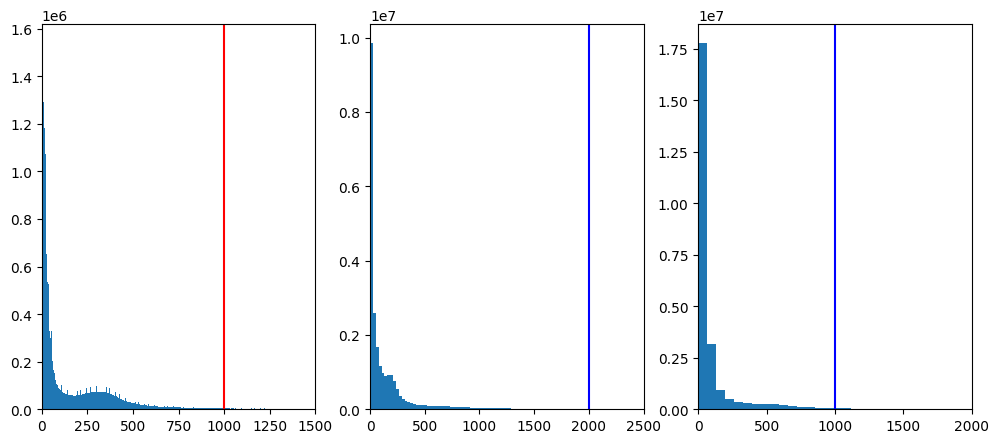

In [30]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 5))
ax = axes.ravel()

ax[0].hist(C1.ravel(), bins=2000)
ax[0].set_xlim([0, 1500])
ax[0].axvline(1000, color='r')
ax[1].hist(C2.ravel(), bins=512)
ax[1].set_xlim([0, 2500])
ax[1].axvline(2000, color='b')
ax[2].hist(C3.ravel(), bins=512)
ax[2].axvline(1000, color='b')
ax[2].set_xlim([0, 2000])

In [79]:
labels_mask, nb_cyst = measure.label(mask, return_num = True)
nb_cyst

38

In [92]:
cutoff_pxko = threshold_otsu(C3)
cutoff_fako = threshold_otsu(C2)
cutoff_foxa2 = threshold_otsu(C1[np.where(C1 < 3)])
#cutoff_pax6 = threshold_otsu(C4[np.where(C4 < 3)])
cutoff_pax6 = threshold_otsu(C4)
cutoff_pax62 = filters.threshold_li(C4)
print(cutoff_pxko, cutoff_fako, cutoff_foxa2, cutoff_pax6, cutoff_pax62)

3.847267881574947 0.8530039685837765 0.568046746080858 75 48.88205968179815


In [85]:
cutoff_marker2 = filters.threshold_multiotsu(C4[np.where(C4 < 300)], classes=3, nbins = 512)
cutoff_marker3 = filters.threshold_multiotsu(C4[np.where(C4 < 300)], classes=4, nbins = 512)
print(cutoff_marker2, cutoff_marker3)
cutoff_marker2 = filters.threshold_multiotsu(C4, classes=3, nbins = 512)
cutoff_marker3 = filters.threshold_multiotsu(C4, classes=4, nbins = 512)
print(cutoff_marker2, cutoff_marker3)

[ 49 122] [ 33  80 145]
[ 58 156] [  58  155 1827]


In [37]:
1.23917381* 93; 190/93

2.043010752688172

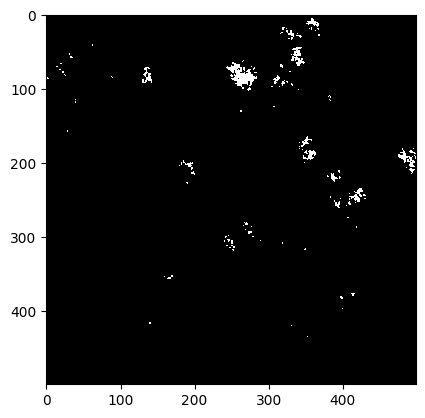

In [94]:
import pyclesperanto_prototype as cle
marker_binary = C4 > 230
## visualize the 3D images https://haesleinhuepf.github.io/BioImageAnalysisNotebooks/16_3d_image_visualization/inspecting_3d_images.html
another_slice = cle.create_2d_xy(marker_binary)
cle.copy_slice(marker_binary, another_slice, slice_index = 46)
# show result
cle.imshow(another_slice)

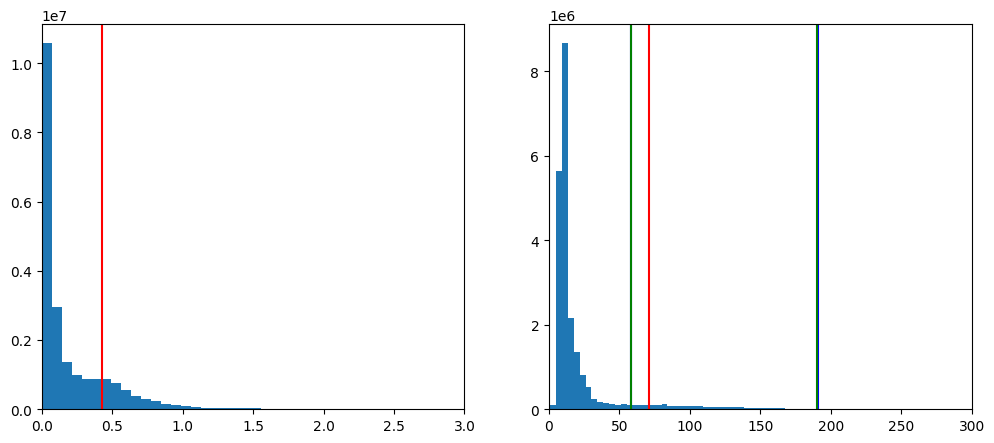

In [47]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 5))
ax = axes.ravel()

ax[0].hist(C1.ravel(), bins=2000)
ax[0].set_xlim([0, 3])
ax[0].axvline(cutoff_foxa2, color='r')

ax[1].hist(C4.ravel(), bins=512)
ax[1].set_xlim([0, 300])
ax[1].axvline(cutoff_pax6, color='r')
ax[1].axvline(cutoff_marker2[0], color='b')
ax[1].axvline(cutoff_marker2[1], color='b')
ax[1].axvline(cutoff_marker3[0], color='g')
ax[1].axvline(cutoff_marker3[1], color='g')
ax[1].axvline(cutoff_marker3[2], color='g')

In [11]:
cutoff_pxko = threshold_otsu(C3)
cutoff_fako = threshold_otsu(C2)
cutoff_foxa2 = threshold_otsu(C1)
cutoff_pax6 = threshold_otsu(C4)
print(cutoff_pxko, cutoff_fako, cutoff_foxa2, cutoff_pax6)

2.0117477589503436 1.639835827808112 6.349190230918142 0.7701402889784946


In [8]:
imageDir = "../images_data/d6_2xTetOn/d6_Isotropic_subset"
outDir = "../images_data/results/d6_2xTetOn"

if not os.path.exists(outDir):
    os.mkdir(outDir)
#os.path.exists(outDir)

In [15]:
import pandas as pd
from skimage import measure
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage import measure
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
import pyclesperanto_prototype as cle
from skimage import filters
from skimage.filters import try_all_threshold
import napari_simpleitk_image_processing as nsitk

from skimage import measure

data = {"image": [], "cyst_index": [], "cyst_size": [], 
        "nb_dapi_cyst_otsu": [],  "nb_dapi_cyst_mean": [],  "nb_dapi_cyst_li": [],  "nb_dapi_cyst_isodata": [],  
        "cutoff_global_nkx": [],  "cutoff_global_foxa2": [], "cutoff_global_pax6": [],
        "nb_global_nkx": [], "nb_global_foxa2": [], "nb_global_pax6": [],
        "nb_foxa2_pax6_pp": [], "nb_foxa2_pax6_pn": [], "nb_foxa2_pax6_np": [], "nb_foxa2_pax6_nn": []
        
       }

df = pd.DataFrame(data)
df

,image,cyst_index,cyst_size,nb_dapi_cyst_otsu,nb_dapi_cyst_mean,nb_dapi_cyst_li,nb_dapi_cyst_isodata,cutoff_global_nkx,cutoff_global_foxa2,cutoff_global_pax6,nb_global_nkx,nb_global_foxa2,nb_global_pax6,nb_foxa2_pax6_pp,nb_foxa2_pax6_pn,nb_foxa2_pax6_np,nb_foxa2_pax6_nn


In [16]:
cutoff_global_nkx = 1000
cutoff_global_foxa2 = 2000
cutoff_global_pax6 = 1000

In [17]:
for nm in os.listdir(imageDir):
    if "_C4_AllCystMask.tiff" in nm:
        #print(nm)
        fileName = nm.replace('_C4_AllCystMask.tiff','')
        #files += [nm]
        print(fileName)
        #make_composite_C5(newName, ImageDir, outDir)
        
        mask = imread(os.path.join(imageDir, str(fileName + "_C4_AllCystMask.tiff"))) # mask segmeted cysts
        C1 = imread(os.path.join(imageDir, str(fileName + "_C1.tif"))) # NKX22
        C2 = imread(os.path.join(imageDir, str(fileName + "_C2.tif"))) # FoxA2
        C3 = imread(os.path.join(imageDir, str(fileName + "_C3.tif"))) # Pax6
        C4 = imread(os.path.join(imageDir, str(fileName + "_C4.tif"))) # DAPI
        
        #C1 = C1 / np.quantile(C1, 0.95)
        #C2 = C2 / np.quantile(C2, 0.95)
        #C3 = C3 / np.quantile(C3, 0.95)
        #C4 = C4 / np.quantile(C4, 0.95)
        
        labels_mask, nb_cyst = measure.label(mask, return_num = True)
        
        #cutoff_fako_global_otsu = filters.threshold_otsu(C2)
        #cutoff_pxko_global_otsu = filters.threshold_otsu(C3)
        
        #C1_filtered = C1[np.where(C1 < 3000)]
        #C4_filtered = C4[np.where(C4 < 1500)]
        #cutoff_foxa2_global_multiotsu = filters.threshold_multiotsu(C1_filtered, classes=3, nbins= 512)[1]
        #cutoff_pax6_global_multiotsu = filters.threshold_multiotsu(C4_filtered, classes=3, nbins = 256)[1]
        
        #cutoff_foxa2_global_multiotsu = 1000
        #cutoff_pax6_global_multiotsu = 350
        
        #cutoff_foxa2_global_multiotsu_2 = filters.threshold_multiotsu(C1_filtered, classes=3, nbins= 512)[1]
        #cutoff_pax6_global_multiotsu_2 = filters.threshold_multiotsu(C4_filtered, classes=3, nbins = 256)[1]
        
        for i in range(nb_cyst+1):
            if i > 0:
                cyst_index = np.where(labels_mask == i)
                
                keep = [fileName, i, cyst_index[0].size]
                
                nkx = C1[cyst_index]
                foxa2 = C2[cyst_index]
                pax6 = C3[cyst_index]
                dapi = C4[cyst_index]
                
                cutoff_dapi_otsu = filters.threshold_otsu(dapi)
                cutoff_dapi_mean = filters.threshold_mean(dapi)
                cutoff_dapi_li = filters.threshold_li(dapi)
                cutoff_dapi_isodata = filters.threshold_isodata(dapi)
                
                index_dapi_otsu = np.where(dapi > cutoff_dapi_otsu)
                index_dapi_mean = np.where(dapi > cutoff_dapi_mean)
                index_dapi_li = np.where(dapi > cutoff_dapi_li)
                index_dapi_isodata = np.where(dapi > cutoff_dapi_isodata)
                
                keep = keep + [index_dapi_otsu[0].size, index_dapi_mean[0].size, index_dapi_li[0].size, index_dapi_isodata[0].size ]
                
                # counting genotype using the global thresholds
                index_nkx = np.where(nkx > cutoff_global_nkx)
                index_foxa2 = np.where(foxa2 > cutoff_global_foxa2)
                index_pax6 = np.where(pax6 > cutoff_global_pax6)
                keep = keep + [cutoff_global_nkx, cutoff_global_foxa2, cutoff_global_pax6, 
                               index_nkx[0].size, index_foxa2[0].size, index_pax6[0].size ]
                
                
                # counting different states
                index_pp = np.where((foxa2 > cutoff_global_foxa2) & (pax6 > cutoff_global_pax6) & (dapi > cutoff_dapi_otsu))
                index_pn = np.where((foxa2 > cutoff_global_foxa2) & (pax6 < cutoff_global_pax6) & (dapi > cutoff_dapi_otsu))
                index_np = np.where((foxa2 < cutoff_global_foxa2) & (pax6 > cutoff_global_pax6) & (dapi > cutoff_dapi_otsu))
                index_nn = np.where((foxa2 < cutoff_global_foxa2) & (pax6 < cutoff_global_pax6) & (dapi > cutoff_dapi_otsu))
                keep = keep + [index_pp[0].size, index_pn[0].size, index_np[0].size, index_nn[0].size]
                
                if (cyst_index[0].size) > 1000:
                    df.loc[len(df)] = keep

20231012_231012_1to5-2xTetON-clones_d6_10x__n26_RA_C9_133_01_isotropic
20231012_231012_1to5-2xTetON-clones_d6_10x__n26_RA_C9_134_01_isotropic
20231012_231012_1to5-2xTetON-clones_d6_10x__n26_RA_C9_135_01_isotropic
20231012_231012_1to5-2xTetON-clones_d6_10x__n26_RA_D9_137_01_isotropic
20231012_231012_1to5-2xTetON-clones_d6_10x__n26_RA_D9_138_01_isotropic
20231012_231012_1to5-2xTetON-clones_d6_10x__n26_RA_D9_139_01_isotropic
20231012_231012_1to5-2xTetON-clones_d6_10x__n26_noRA_B9_129_01_isotropic
20231012_231012_1to5-2xTetON-clones_d6_10x__n26_dox-wash-d2_E9_141_01_isotropic
20231012_231012_1to5-2xTetON-clones_d6_10x__n26_dox-wash-d2_E9_142_01_isotropic
20231012_231012_1to5-2xTetON-clones_d6_10x__n26_dox-wash-d2_E9_143_01_isotropic
20231012_231012_1to5-2xTetON-clones_d6_10x__n26_dox-wash-d2_F9_145_01_isotropic
20231012_231012_1to5-2xTetON-clones_d6_10x__n26_dox-wash-d2_F9_146_01_isotropic
20231012_231012_1to5-2xTetON-clones_d6_10x__n26_dox-wash-d2_F9_147_01_isotropic
20231012_231012_1to5-

In [18]:
df

,image,cyst_index,cyst_size,nb_dapi_cyst_otsu,nb_dapi_cyst_mean,nb_dapi_cyst_li,nb_dapi_cyst_isodata,cutoff_global_nkx,cutoff_global_foxa2,cutoff_global_pax6,nb_global_nkx,nb_global_foxa2,nb_global_pax6,nb_foxa2_pax6_pp,nb_foxa2_pax6_pn,nb_foxa2_pax6_np,nb_foxa2_pax6_nn
0,20231012_231012_1to5-2xTetON-clones_d6_10x__n2...,1,4464,2451,2334,2856,2451,1000,2000,1000,147,12,1371,0,0,1321,1128
1,20231012_231012_1to5-2xTetON-clones_d6_10x__n2...,2,13256,7270,6873,8667,7270,1000,2000,1000,28,0,7622,0,0,6469,798
2,20231012_231012_1to5-2xTetON-clones_d6_10x__n2...,3,17472,8296,8535,9769,8296,1000,2000,1000,5484,4591,321,27,3428,275,4556
3,20231012_231012_1to5-2xTetON-clones_d6_10x__n2...,4,26380,13197,13188,15604,13208,1000,2000,1000,1,420,18462,206,0,12888,103
4,20231012_231012_1to5-2xTetON-clones_d6_10x__n2...,5,54764,25673,26490,30435,25679,1000,2000,1000,5171,2757,30474,1214,374,23017,1067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3179,20231012_231012_1to5-2xTetON-clones_d6_10x__wt...,62,8876,4770,4594,5293,4779,1000,2000,1000,0,0,8,0,0,8,4761
3180,20231012_231012_1to5-2xTetON-clones_d6_10x__wt...,63,7104,2886,3295,3604,2886,1000,2000,1000,0,0,0,0,0,0,2886
3181,20231012_231012_1to5-2xTetON-clones_d6_10x__wt...,64,7224,2820,3263,3478,2823,1000,2000,1000,0,0,2485,0,0,1910,910
3182,20231012_231012_1to5-2xTetON-clones_d6_10x__wt...,65,53332,24799,25942,30323,24823,1000,2000,1000,10,0,218,0,0,106,24692


In [19]:
df.to_csv(os.path.join(outDir, "cyst_size_NKX22_FoxA2Pax6_states_maualGlobalThreshods_DAPIcounts_v2.csv"), index=True, header=True)